<a href="https://colab.research.google.com/github/Balaprabavathi/Fake-News-Classifier/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords # the - for - in - with
from nltk.stem.porter import PorterStemmer # loving - loved = love
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/WELFake_Dataset.csv'

In [4]:
data=pd.read_csv(path)
data

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [5]:
data.shape

(72134, 4)

In [6]:
data.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [7]:
data.fillna(' ',inplace=True)

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

<Axes: xlabel='label', ylabel='count'>

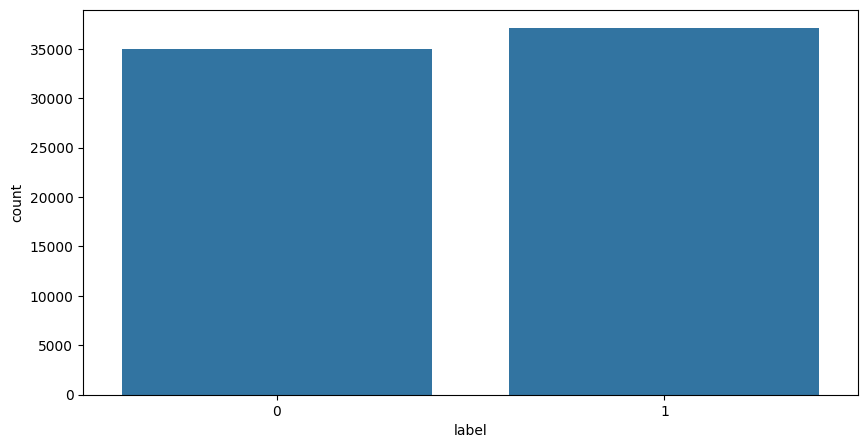

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='label',data=data)

In [10]:
data['body_len'] = data['text'].apply(len)

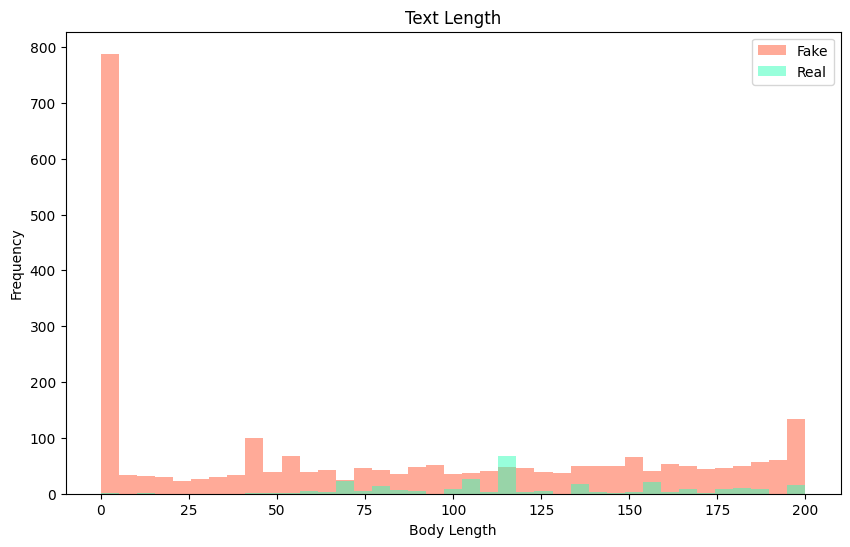

In [11]:
bins = np.linspace(0, 200, 40)
plt.figure(figsize=(10, 6))
plt.hist(data[data["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(data[data["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.xlabel('Body Length')
plt.ylabel('Frequency')
plt.title('Text Length')
plt.legend(loc='upper right')
plt.show()

In [12]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
cleaned_data=[]
ps=PorterStemmer()
for i in range(0,len(data)):
  text=re.sub('[^a-zA-Z]',' ',data['text'][i])#remove special characters
  text=text.lower()
  text=word_tokenize(text)
  text=[ps.stem(word) for word in text if not word in stopwords.words('english')]#stemming and remove stopwords
  text=' '.join(text)
  cleaned_data.append(text)

In [15]:
cv = CountVectorizer()
x = cv.fit_transform(cleaned_data)

In [16]:
y=data['label'].values

In [17]:
print(y)

[1 1 1 ... 0 0 1]


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
# Install xgboost
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.0 MB/s eta 0:00:00


In [20]:
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.1, n_estimators=500)

In [21]:
history=xgb.fit(x_train,y_train)

In [22]:
prediction=xgb.predict(x_test)

In [23]:
xgb.score(x_train,y_train)

0.9892214116138424

In [24]:
xgb.score(x_test,y_test)

0.9661745338601234

In [25]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7089
           1       0.95      0.98      0.97      7338

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



Text(70.72222222222221, 0.5, 'Real Labels')

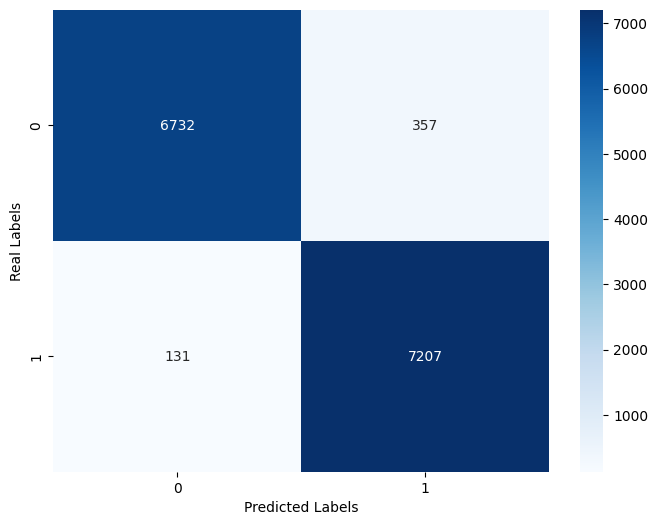

In [26]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,prediction), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [27]:
rf=RandomForestClassifier(n_estimators=500)

In [28]:
history2=rf.fit(x_train,y_train)

In [29]:
rf.score(x_train,y_train)

0.99996534215953

In [30]:
prediction2=rf.predict(x_test)

In [31]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7089
           1       0.94      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



In [32]:
rf.score(x_test,y_test)

0.9417065224925487

Text(70.72222222222221, 0.5, 'real labels')

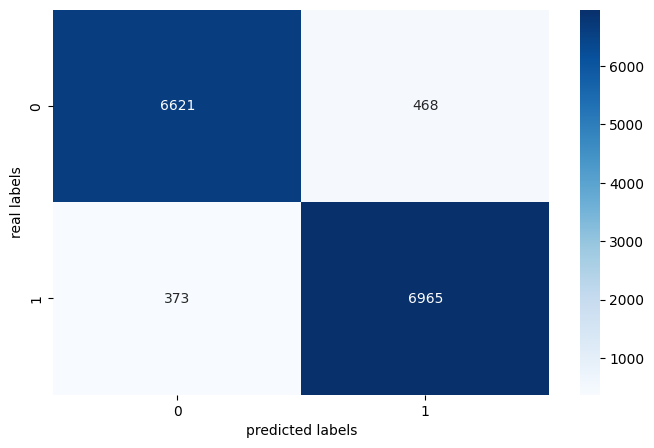

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,prediction2),annot=True,fmt='', cmap='Blues')
plt.xlabel('predicted labels')
plt.ylabel('real labels')

In [35]:
def predict_fake_news(new_text):
   if prediction[0] == 0:
        return "This news appears to be REAL"
   else:
        return "This news appears to be FAKE"

# Example usage:
news_text = "WASHINGTON (Reuters) - U.S. President Donald Trump spoke on Tuesday with Russian President Vladimir Putin and the two leaders stressed the importance of the U.N.-led peace process in resolving the Syrian civil war, the White House said in a statement. In the more than hour-long phone call, Trump and Putin also agreed to explore ways to cooperate in the fight against militant groups such as Islamic State, the statement said. In addition, the two leaders discussed how to achieve peace in Ukraine and the need to keep pressure on North Korea to end its nuclear program, it said"
result = predict_fake_news(news_text)
print(result)

This news appears to be FAKE
